In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("all_results_21582.csv")

relevant_keys_f1 = [key for key in data.keys().tolist() if key.endswith("_f1")]

data["best_F1"] = None

data_values = pd.DataFrame(columns=["batch_size", "epochs", "weight_decay", "LR", "F1"])

for index, row in data.iterrows():

    result = []

    for key in relevant_keys_f1:
        value = row[key]
        result.append(value)

    average = sum(result)/len(relevant_keys_f1) * 100
    data.loc[index, "best_F1"] = average
    info_array = row["info"].split("_")[2:6]
    index = len(data_values)

    data_values.loc[index, "batch_size"] = info_array[0]
    data_values.loc[index, "epochs"] = info_array[1]
    data_values.loc[index, "weight_decay"] = info_array[2]
    data_values.loc[index, "LR"] = info_array[3]
    data_values.loc[index, "F1"] = average

data_values

,batch_size,epochs,weight_decay,LR,F1
0,1,1,0,1e-05,39.73317
1,1,1,0.01,1e-05,39.839736
2,1,1,0.001,1e-05,39.759815
3,2,1,0,1e-05,33.658654
4,2,1,0.01,1e-05,33.658654
...,...,...,...,...,...
715,16,10,0.01,5e-05,63.762388
716,16,10,0.001,5e-05,63.471285
717,32,10,0,5e-05,61.838699
718,32,10,0.01,5e-05,61.765919


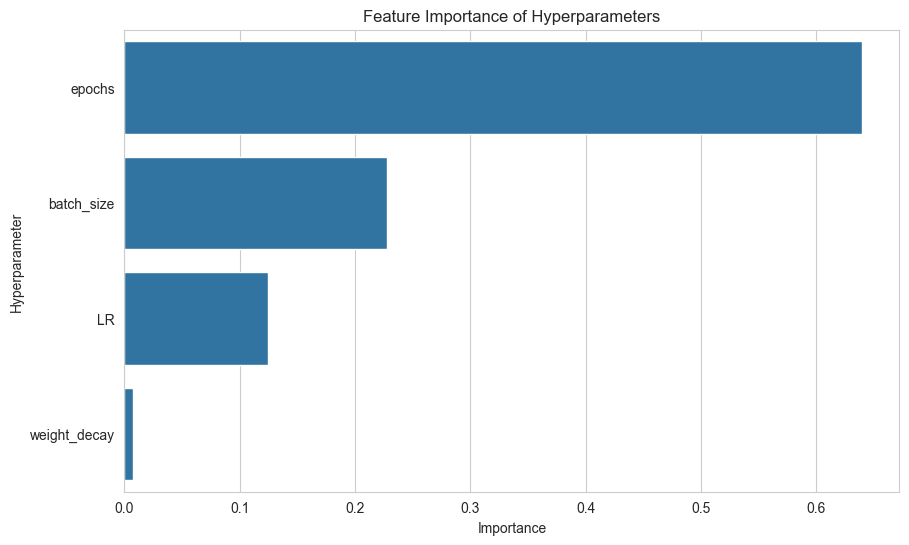

,hyperparameter,importance
1,epochs,0.640088
0,batch_size,0.228103
3,LR,0.124425
2,weight_decay,0.007384


In [3]:
def identify_influential_hyperparameters(df, performance_metric):
    X = df.drop(columns=[performance_metric])
    y = df[performance_metric]

    for col in X.select_dtypes(include=['object', 'category']).columns:
        X[col] = LabelEncoder().fit_transform(X[col])

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    feature_importances = model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'hyperparameter': X.columns,
        'importance': feature_importances
    }).sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='hyperparameter', data=feature_importance_df)
    plt.title('Feature Importance of Hyperparameters')
    plt.xlabel('Importance')
    plt.ylabel('Hyperparameter')
    plt.show()

    return feature_importance_df

identify_influential_hyperparameters(data_values, 'F1')

In [4]:
def correlation_analysis(df, performance_metric):
    corr_matrix = df.corr()
    return corr_matrix[performance_metric].drop(performance_metric).sort_values(ascending=False)

correlation_analysis(data_values, 'F1')

epochs          0.693178
LR              0.260276
weight_decay    0.001746
batch_size     -0.387477
Name: F1, dtype: float64

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
correlation_matrix = data_values.corr()
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

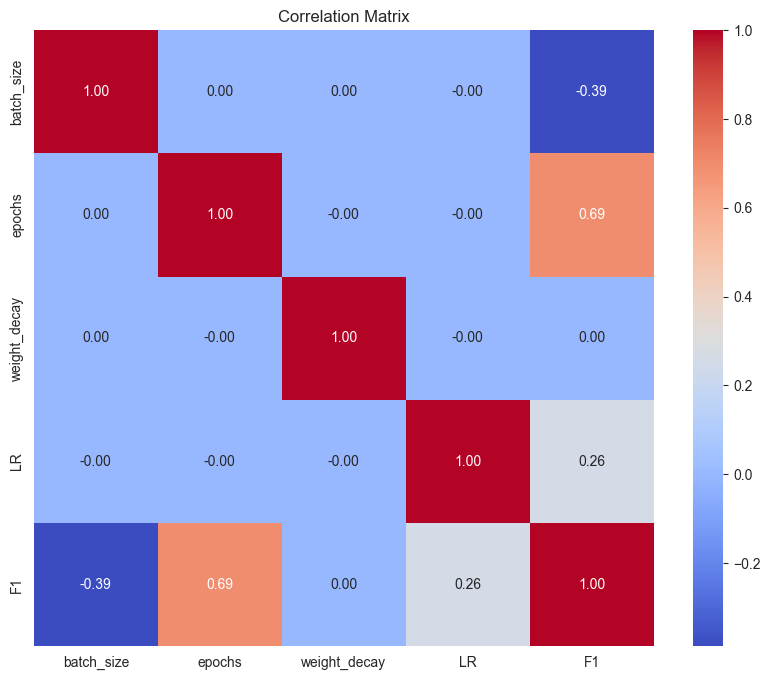

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    #mask=mask,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix")
plt.show()

In [11]:
performance_correlations = correlation_matrix['F1'].drop('F1')
most_influential = performance_correlations.abs().idxmax()

print(f"The most influential hyperparameter is: {most_influential}")

The most influential hyperparameter is: epochs
